<a href="https://colab.research.google.com/github/Tama101/Predictive-Maintenance-For-Machine-Failure/blob/main/Predictive_Maintenance_Multi_Output_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This project aims to develop a predictive maintenance model using an Artificial Neural Network (ANN) that can accurately classify failure types and predict the occurrence of a failure in a binary format. The model uses five features, namely air temperature, process temperature, rotational speed, torque, and tool wear to predict the target features.

The first target feature is Failure Type, which is a multi-class classification problem. The model is trained to classify different types of failures, such as tool wear, breakage, and surface damage. The model achieves an accuracy of 95% in classifying the failure types, which can be used to identify the type of maintenance required for the system.

The second target feature is the occurrence of failure, which is a binary classification problem. The model is trained to predict whether a failure will occur or not, based on the input features. The model achieves an accuracy of 95% in predicting the occurrence of failure, which can be used to schedule maintenance activities before the system breaks down.

The model uses an Artificial Neural Network (ANN) to make predictions, which is a powerful machine learning algorithm capable of handling non-linear relationships between input features and target variables. The ANN is trained using a large dataset of historical data, which enables the model to learn patterns and make accurate predictions.

Overall, this project demonstrates the effectiveness of using an ANN-based approach to develop a predictive maintenance model for industrial systems. The model's high accuracy in predicting failure types and occurrence can help improve system uptime, reduce maintenance costs, and increase overall productivity.

# **1. Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file = '/content/drive/MyDrive/Dataset/predictive_maintenance.csv'

In [5]:
df = pd.read_csv(file)

In [6]:
pd.options.display.max_columns = None

df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# **2. Exploratory Data Analysis**

In [7]:
# Dataset size

print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Rows : 10000
Columns : 10


In [8]:
# features type
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [9]:
# missing data

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [10]:
# numerical feature
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00,2.00,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.01,1.48,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.78,179.28,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.99,9.97,3.8,33.2,40.1,46.8,76.6


In [11]:
# number of unique
df[['Product ID', 'Type', 'Target', 'Failure Type']].nunique()

Product ID      10000
Type                3
Target              2
Failure Type        6
dtype: int64

In [12]:
# Select all columns of type 'object'
object_columns = ['Product ID', 'Type', 'Target', 'Failure Type']

# Print value counts for each object column
for col in object_columns:
    print(col)
    print(df[col].value_counts())
    print('■' * 60)

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
Type
L    6000
M    2997
H    1003
Name: Type, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
Target
0    9661
1     339
Name: Target, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


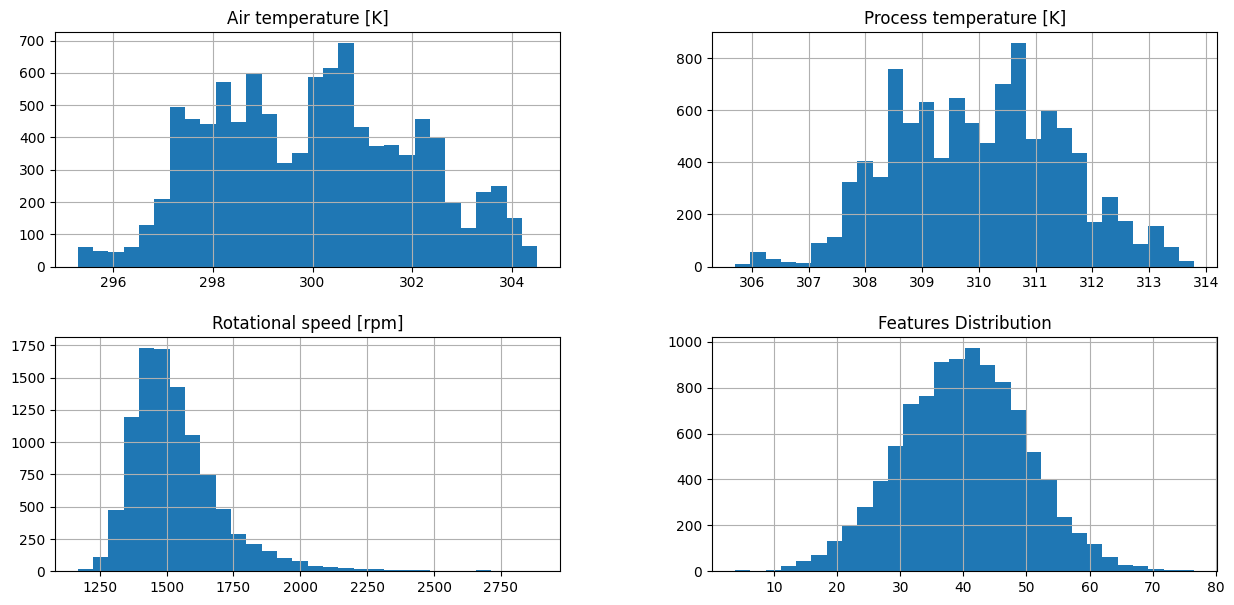

In [13]:
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']].hist(figsize=(15,7),bins = 30)
plt.title("Features Distribution")
plt.show()

In [14]:
# drop unnecessary feature

df = df.drop('UDI', axis=1)

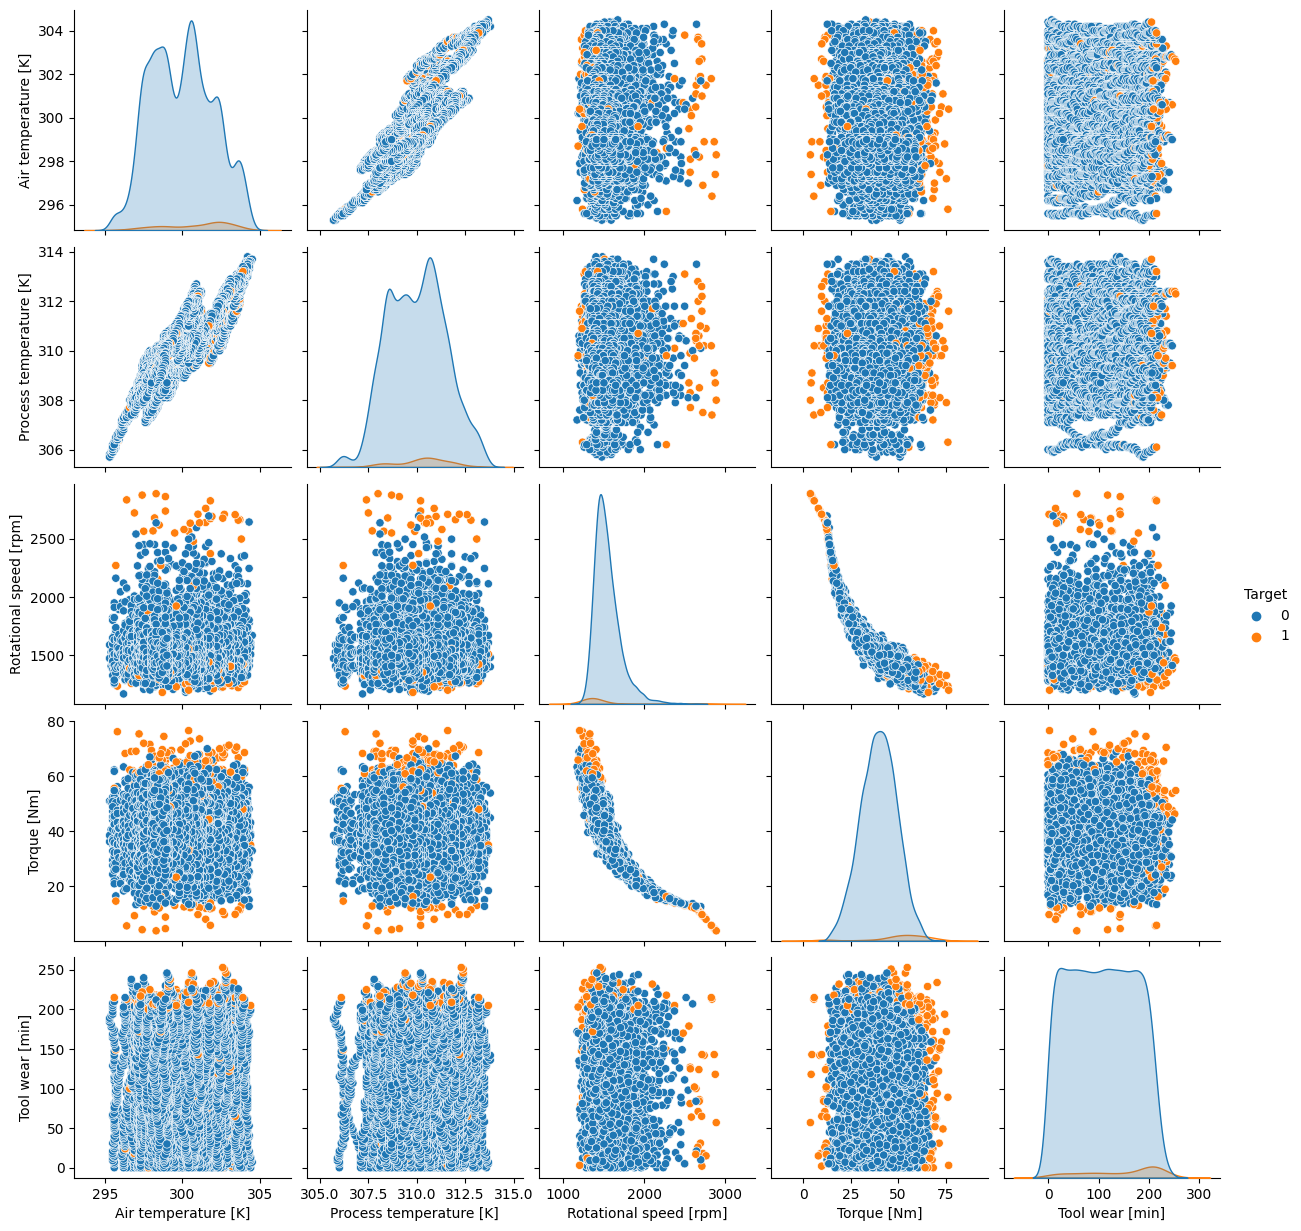

In [15]:
sns.pairplot(df, hue='Target')

```Insight :```  

A strong correlation has been found between the two, indicating the importance of the relationship between torque and rotational speed. Similar to this, there is a strong correlation between process temperature and air temperature.

Further investigation reveals that certain features, such as torque and rotational speed, tend to have extreme values at which machinery failures are more likely to happen. The graph clearly shows this pattern because the orange dots are spaced widely for these specific features. As a result, the machines have a normal range of operating conditions, and any values outside of this range raise the risk of machine failure.

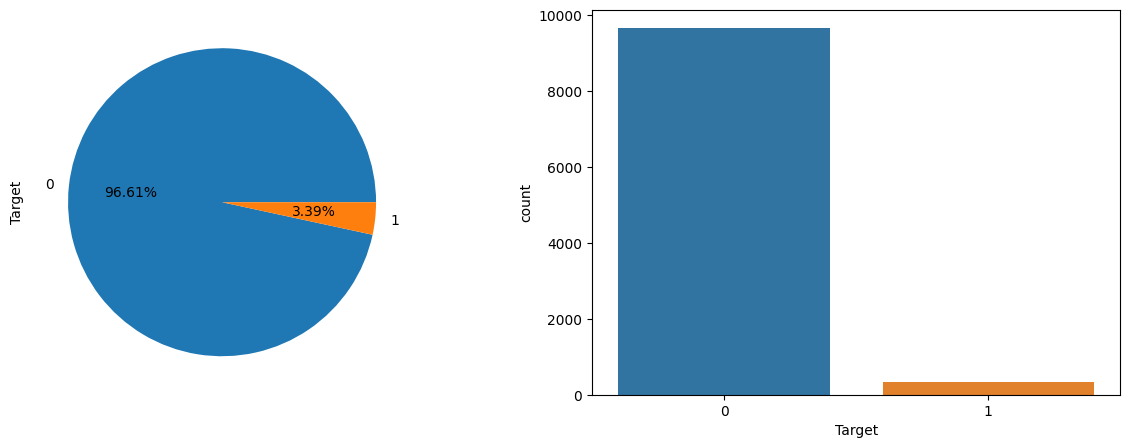

In [16]:
# Target balance

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['Target'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Target', data = df)
plt.show()

The target feature in this particular project is highly imbalanced, with only 3.39% of the data representing a failure, while the remaining 96.61% representing no failure. This indicates that the dataset is skewed towards instances of normal machine operation, making it difficult for the model to accurately predict instances of failure.

The highly imbalanced nature of the dataset can present challenges for the predictive maintenance model. Traditional machine learning models may struggle to identify patterns in such data, as they tend to prioritize accuracy in the majority class, resulting in poor performance in the minority class.

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

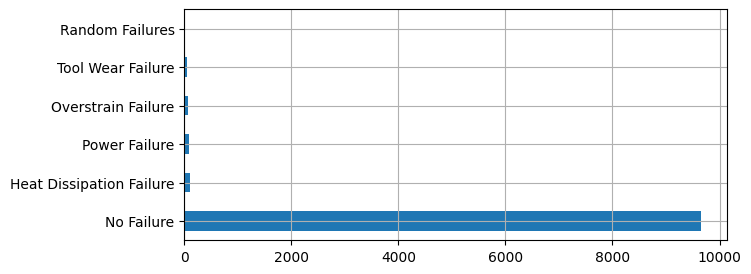

In [17]:
df['Failure Type'].value_counts().plot(kind='barh', figsize=(7,3), grid=True)
df['Failure Type'].value_counts()

The failure type feature in this project is highly imbalanced, with 6 classes and a significant disparity in the number of instances between them. The "No Failure" class is overrepresented, with 9652 instances, while the other classes have significantly fewer instances, with "Heat Dissipation Failure" at 112, "Power Failure" at 95, "Overstrain Failure" at 78, "Tool Wear Failure" at 45, and "Random Failures" at 18.

This imbalance can present challenges for machine learning models, as they may struggle to learn patterns in the minority classes. Techniques such as oversampling or undersampling may be used to balance the dataset and improve model performance, while alternative approaches such as cost-sensitive learning or resampling methods may also be considered. 

In [18]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 10.1 MB/s eta 0:00:00


In [19]:
from phik import phik_matrix
import seaborn as sns
import numpy as np

def plot_phik_matrix(df):

    phik_mat = phik_matrix(df)
    plt.figure(figsize=(10, 5))
    sns.heatmap(phik_mat, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Variable')
    plt.show()

interval columns not set, guessing: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


/usr/local/lib/python3.9/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Product ID is large: 10000. Are you sure this is not an interval variable? Analysis for pairs of variables including Product ID can be slow.
  warnings.warn(


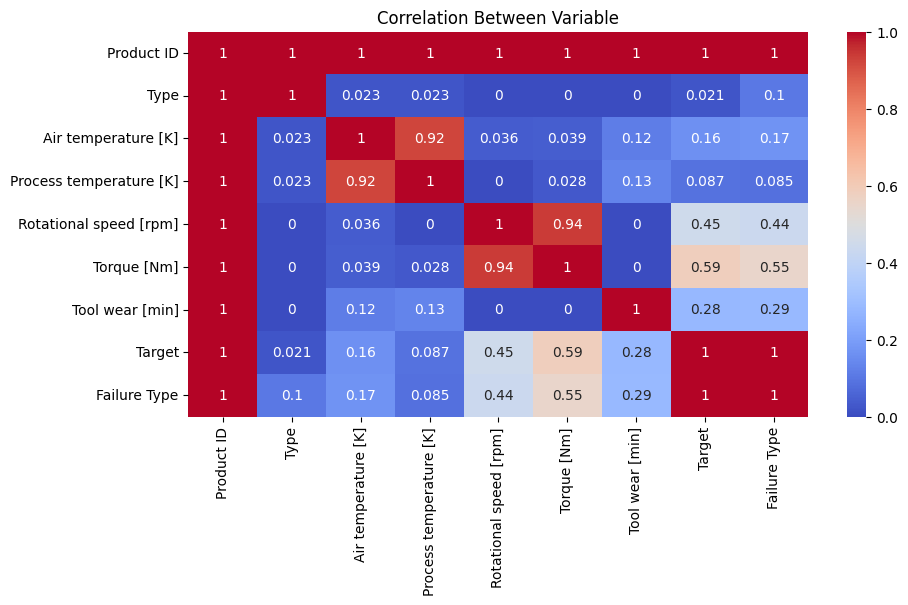

In [20]:
plot_phik_matrix(df)

In [21]:
pd.DataFrame(phik_matrix(df).round(3))

interval columns not set, guessing: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


/usr/local/lib/python3.9/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Product ID is large: 10000. Are you sure this is not an interval variable? Analysis for pairs of variables including Product ID can be slow.
  warnings.warn(


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
Product ID,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Type,1.0,1.000,0.023,0.023,0.000,0.000,0.000,0.021,0.104
Air temperature [K],1.0,0.023,1.000,0.923,0.036,0.039,0.116,0.161,0.170
Process temperature [K],1.0,0.023,0.923,1.000,0.000,0.028,0.132,0.087,0.085
Rotational speed [rpm],1.0,0.000,0.036,0.000,1.000,0.938,0.000,0.449,0.437
Torque [Nm],1.0,0.000,0.039,0.028,0.938,1.000,0.000,0.585,0.548
Tool wear [min],1.0,0.000,0.116,0.132,0.000,0.000,1.000,0.278,0.285
Target,1.0,0.021,0.161,0.087,0.449,0.585,0.278,1.000,1.000
Failure Type,1.0,0.104,0.170,0.085,0.437,0.548,0.285,1.000,1.000


```Insight :```  

The Phik matrix provides a matrix of phi correlation coefficients between all pairs of features in a dataset. The phi coefficient measures the correlation between two categorical variables, taking into account not only their joint occurrence but also their individual frequencies.

Looking at the Phik matrix, we can see that the diagonal values are all equal to 1, indicating that each feature is perfectly correlated with itself. This is expected since the correlation between a feature and itself is always 1.

The values above the diagonal are the same as the values below the diagonal since the matrix is symmetric.

Looking at the non-perfect correlation values, we can see that "Air temperature [K]" and "Process temperature [K]" have a relatively high correlation coefficient of 0.923. Similarly, "Rotational speed [rpm]" and "Torque [Nm]" have a high correlation coefficient of 0.938. These correlations suggest that these pairs of features may be related, and it may be useful to explore this relationship further.

Tool wear has a low correlation coefficient with all other features, indicating that it may not be strongly related to the other features and may not be very useful in predicting the target or failure type.

Finally, we can see that the target and failure type are perfectly correlated with each other and have relatively high correlation coefficients with some of the other features, suggesting that these features may be important predictors of the target and failure type.

In [22]:
# Dataset for target 0 (no failure)
t_0 = df[df.Target == 0]
t_1 = df[df.Target == 1]

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

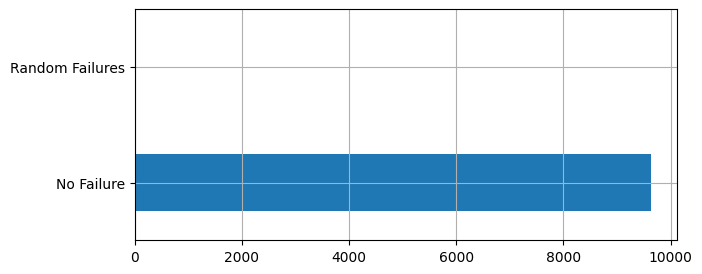

In [23]:
t_0['Failure Type'].value_counts().plot(kind='barh', figsize=(7,3), grid=True)
t_0['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

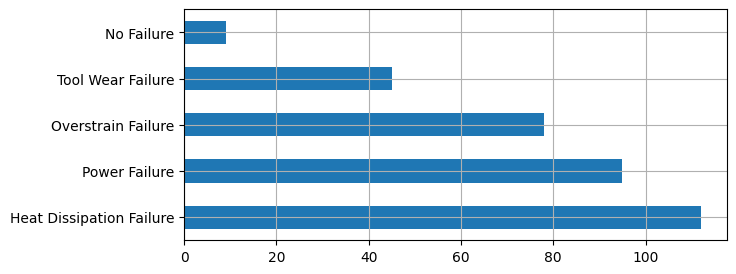

In [24]:
t_1['Failure Type'].value_counts().plot(kind='barh', figsize=(7,3), grid=True)
t_1['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

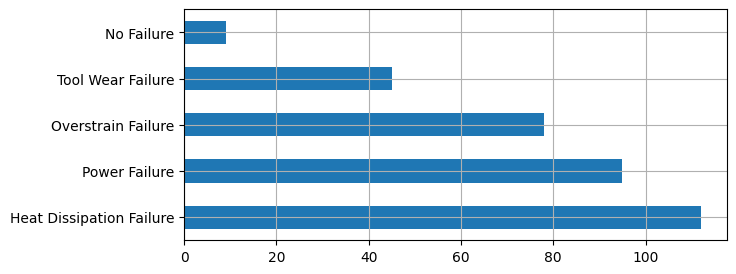

In [25]:
t_1['Failure Type'].value_counts().plot(kind='barh', figsize=(7,3), grid=True)
t_1['Failure Type'].value_counts()

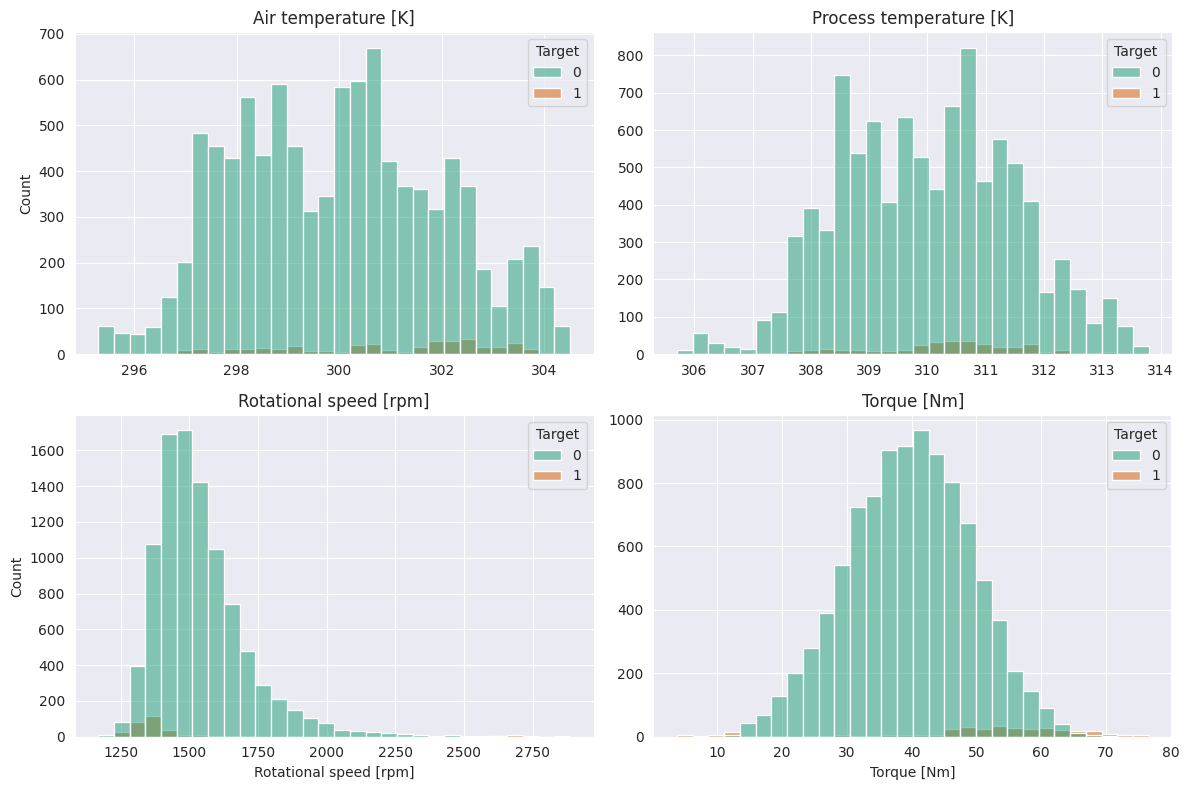

In [26]:
# Numerical distribution comparison between target 0 and target 1

import matplotlib.pyplot as plt
import seaborn as sns

# Set style to whitegrid
sns.set_style("darkgrid")

# Create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten axis for easy iteration
axs = axs.flatten()

# Loop through each feature and create histogram
for i, feature in enumerate(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']):
    
    # Plot histogram
    sns.histplot(data=df, x=feature, hue='Target', kde=False, bins=30, ax=axs[i], palette='Dark2')
    
    # Set subplot title
    axs[i].set_title(f'{feature}')
    
    # Remove x-axis label for subplots not on the bottom row
    if i < 2:
        axs[i].set_xlabel('')
    
    # Remove y-axis label for subplots not on the left column
    if i % 2 != 0:
        axs[i].set_ylabel('')

# Adjust subplots spacing
fig.tight_layout()
plt.show()


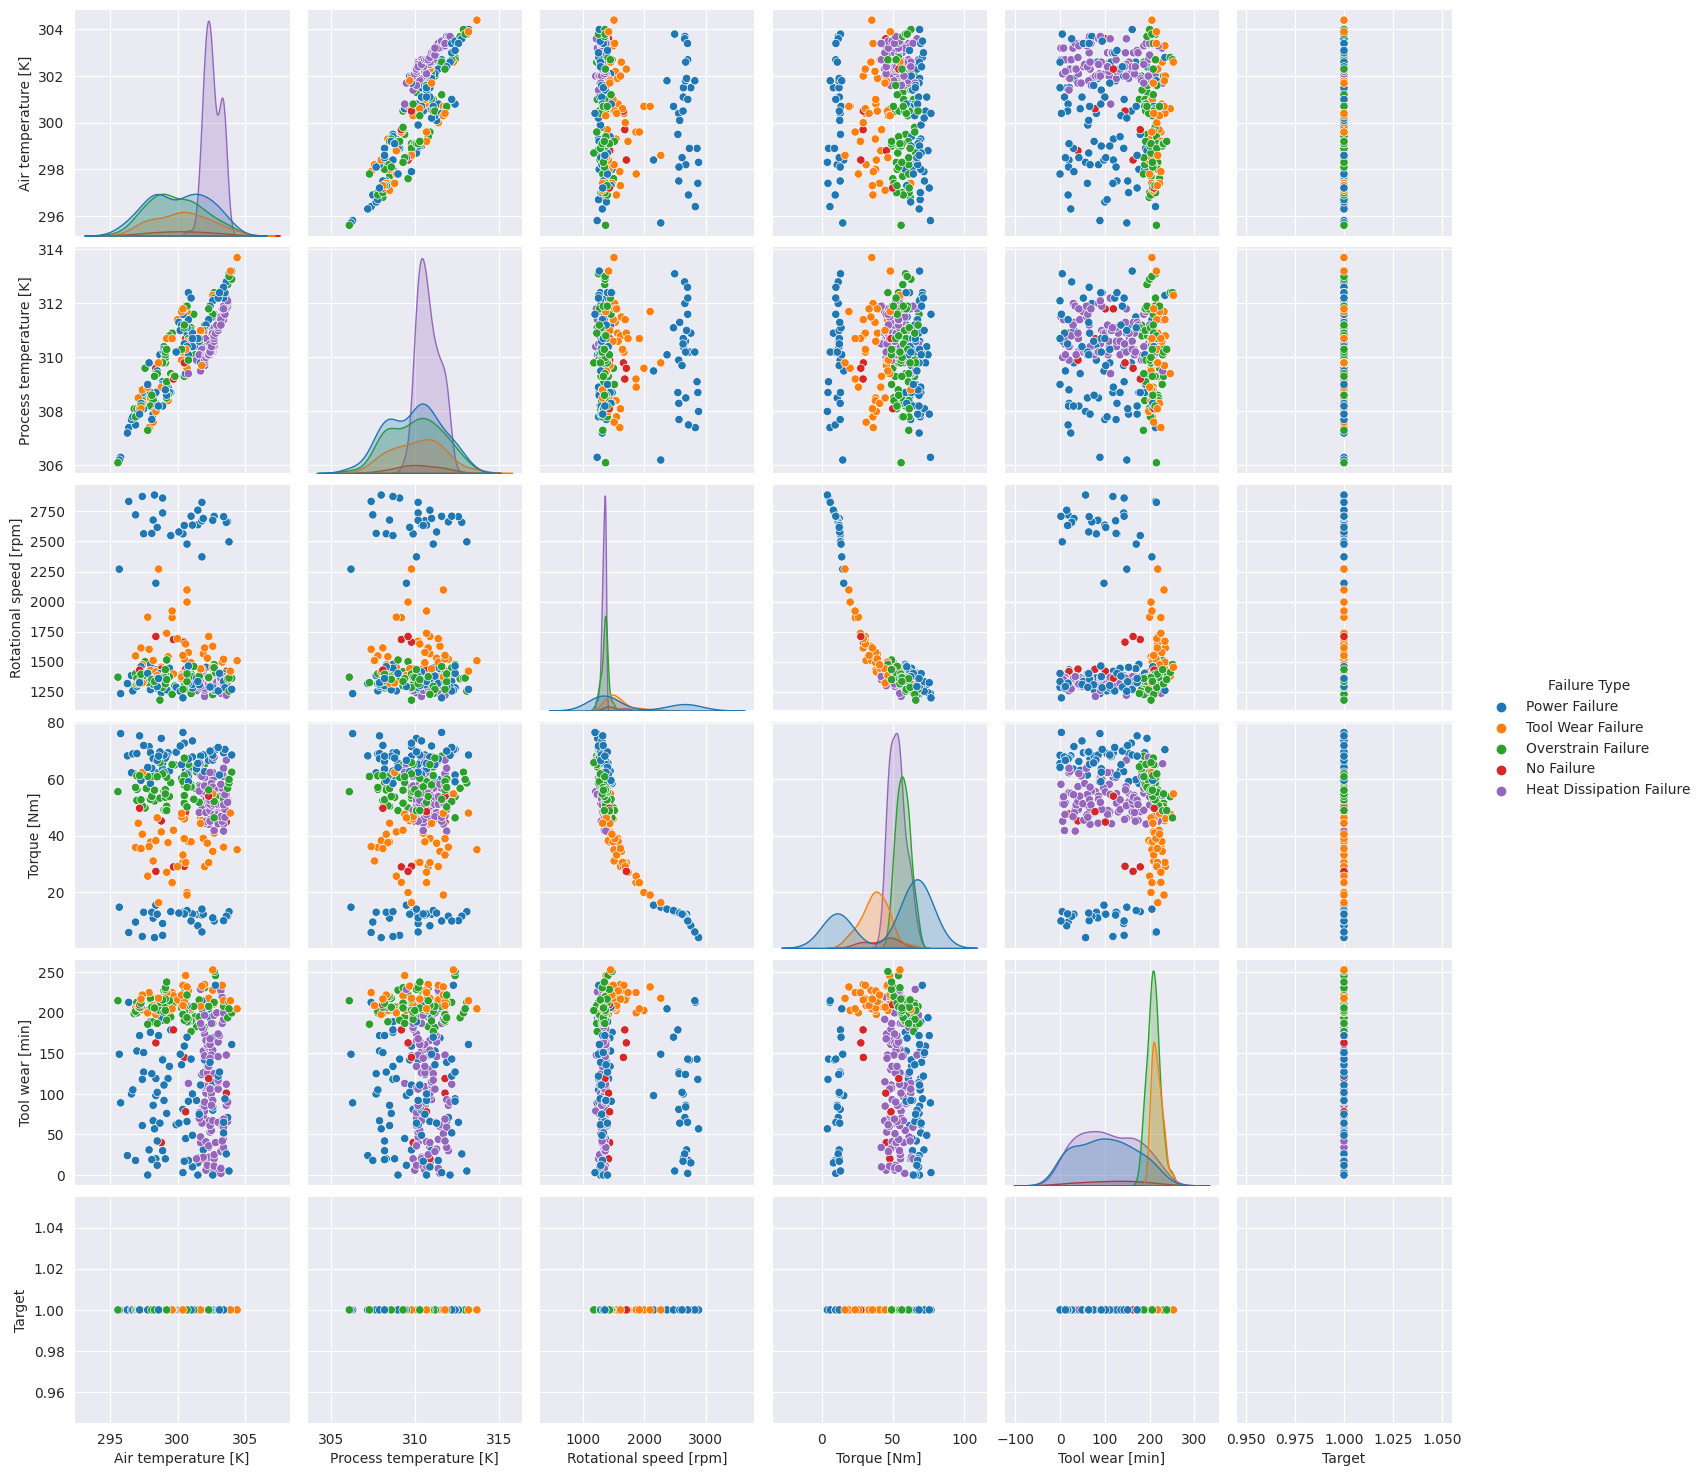

In [27]:
sns.pairplot(df[df.Target == 1], hue='Failure Type')

In [28]:
df[df.Target == 1].Type.value_counts()

L    235
M     83
H     21
Name: Type, dtype: int64

# **3. Preprocessing**

## 3.1. Outlier

In [29]:
numlist = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
catlist = df.drop(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], axis=1).columns.tolist()

### 3.1.1 Outlier original dataset

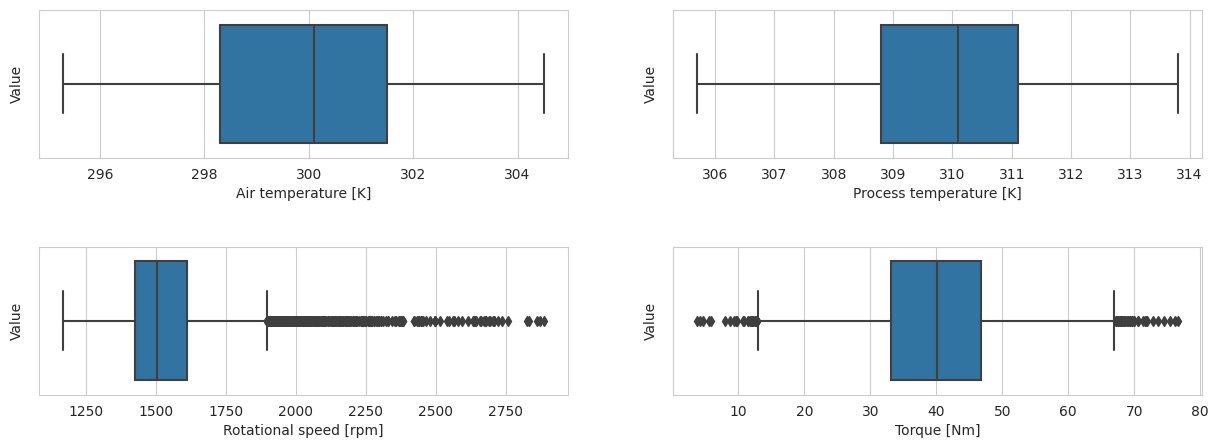

In [30]:
# Check outlier

# Boxplot outlier

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

### 3.1.2. Outlier target 0 dataset

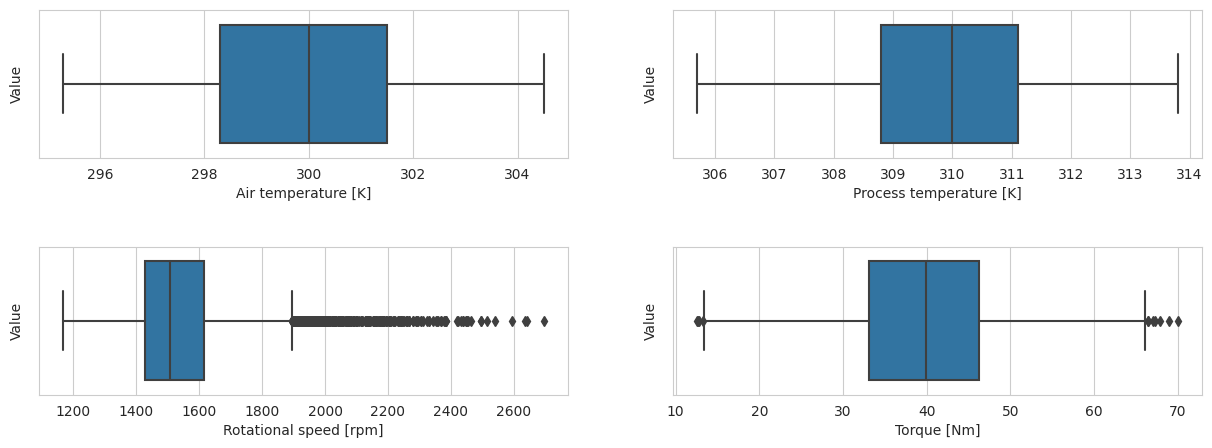

In [31]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(t_0[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=t_0[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

## 3.1.3. Outlier target 1 dataset

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(t_1[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=t_1[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

## 3.2. Cleaning Outlier

In [32]:
# interquartile range
iqr = df.quantile(0.75) - df.quantile(0.25)

# outliers into index array
outl_index = df[numlist][((df[numlist] < (df.quantile(0.25) - 1.5 * iqr)) |(df[numlist] > (df.quantile(0.75) + 1.5 * iqr))).any(axis=1)].index.tolist()

<ipython-input-32-81713ea2904d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iqr = df.quantile(0.75) - df.quantile(0.25)
<ipython-input-32-81713ea2904d>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  outl_index = df[numlist][((df[numlist] < (df.quantile(0.25) - 1.5 * iqr)) |(df[numlist] > (df.quantile(0.75) + 1.5 * iqr))).any(axis=1)].index.tolist()
<ipython-input-32-81713ea2904d>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outl_index = df[numlist][((df[numl

In [33]:
print('Outlier percentage :', round(len(outl_index) / len(df) * 100, 1), '%')

Outlier percentage : 4.6 %


In [34]:
# drop outlier from dataset
df_clean = df.drop(index=outl_index, axis=1)

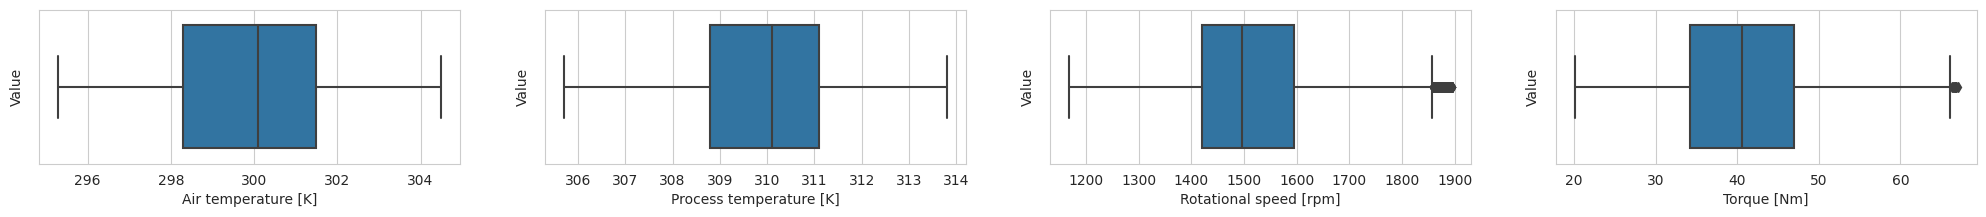

In [35]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,2), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df_clean[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df_clean[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

## 3.3 Feature Engineering

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

def transform_data(df_clean, numlist, catlist):
    
    # Define the preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numlist),
            ('cat', OrdinalEncoder(), catlist)
        ])

    # Fit and transform the preprocessor on the input dataframe
    x_transformed = preprocessor.fit_transform(df_clean)

    return x_transformed

In [37]:
df_transformed = transform_data(df_clean, numlist, catlist)
df_transformed = pd.DataFrame(df_transformed, columns=numlist+catlist)
df_transformed['Failure Type'] = df_transformed['Failure Type'].astype(int)

In [38]:
df_transformed.dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Product ID                 float64
Type                       float64
Tool wear [min]            float64
Target                     float64
Failure Type                 int64
dtype: object

In [39]:
df_transformed['Failure Type'].value_counts()

1    9265
0     111
2      76
5      41
3      30
4      18
Name: Failure Type, dtype: int64

## 3.4. Synthetic Minority Over-sampling Technique (SMOTE) for Failure Type Feature

In [40]:
from sklearn.model_selection import train_test_split

# Split data into features and targets
x = df_transformed.drop(['Failure Type'], axis=1)
y = df_transformed['Failure Type'] #binary with highly imbalance target

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from imblearn.over_sampling import SMOTE

# Calculate the number of samples to generate for each class
class_counts = y_train.value_counts()
n_samples = class_counts.max()

# Use SMOTE to balance the multi-class target variable in the training set
smote = SMOTE(sampling_strategy={k: n_samples for k in class_counts.index}, k_neighbors=2, random_state=42)
x_res_train, y_res_train = smote.fit_resample(x_train, y_train)

# Use SMOTE to balance the multi-class target variable in the test set
smote = SMOTE(sampling_strategy={k: n_samples for k in class_counts.index}, k_neighbors=2, random_state=42)
x_res_test, y_res_test = smote.fit_resample(x_test, y_test)


/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (7418) in class 1 will be larger than the number of samples in the majority class (class #1 -> 1847)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (7418) in class 0 will be larger than the number of samples in the majority class (class #1 -> 1847)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (7418) in class 2 will be larger than the number of samples in the majority class (class #1 -> 1847)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (7418) in class 5 will be larger than the number of samples in the majority class (class #1 -> 1847)
  warnings.warn(
/usr/loc

In [42]:
print('x_res_train', x_res_train.shape)
print('y_res_train', y_res_train.shape)
print('x_res_test', x_res_test.shape)
print('y_res_test', y_res_test.shape)

x_res_train (44508, 8)
y_res_train (44508,)
x_res_test (44508, 8)
y_res_test (44508,)


In [43]:
df_resampled = pd.concat([pd.concat([x_res_train, y_res_train], axis=1), pd.concat([x_res_test, y_res_test], axis=1)], axis=0)
df_resampled['Target'] = df_resampled['Target'].astype(int)

In [44]:
df_resampled['Failure Type'].value_counts()

1    14836
0    14836
2    14836
5    14836
4    14836
3    14836
Name: Failure Type, dtype: int64

In [45]:
df_resampled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Product ID,Type,Tool wear [min],Target,Failure Type
0,1.756826,1.957792,0.437456,0.439063,8171.000000,2.000000,83.000000,0,1
1,-0.548142,-0.742904,-0.717530,0.764146,1010.000000,1.000000,14.000000,0,1
2,-0.548142,0.202340,-0.240136,0.338174,1743.000000,1.000000,123.000000,0,1
3,-0.748574,-1.215525,-0.548132,-0.031748,6669.000000,1.000000,169.000000,0,1
4,1.706718,1.282618,-1.064026,0.091559,3742.000000,1.000000,33.000000,1,0
...,...,...,...,...,...,...,...,...,...
44503,-0.185958,0.690360,0.951484,-0.777705,8870.143771,2.000000,213.259108,1,5
44504,0.152833,0.339546,1.240604,-1.195214,8491.157599,2.000000,228.451767,1,5
44505,0.986964,0.062329,0.111652,-0.040173,4913.878131,1.327192,227.092126,1,5
44506,0.626662,-0.296522,-0.784508,0.625663,1999.821255,0.537121,237.091672,1,5


## 3.5. Synthetic Minority Over-sampling Technique (SMOTE) for Failure Type Feature

1    59353
0    29663
Name: Target, dtype: int64

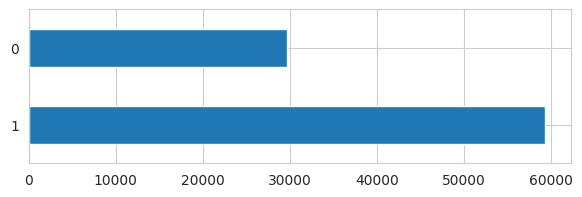

In [46]:
df_resampled['Target'].value_counts().plot(kind='barh', figsize=(7,2))
df_resampled['Target'].value_counts()

In [47]:
# Split data into features and targets
x = df_resampled.drop(['Target'], axis=1)
y = df_resampled['Target'] 

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
print('x_res_train', x_res_train.shape)
print('y_res_train', y_res_train.shape)
print('x_res_test', x_res_test.shape)
print('y_res_test', y_res_test.shape)

x_res_train (44508, 8)
y_res_train (44508,)
x_res_test (44508, 8)
y_res_test (44508,)


In [49]:
# Use SMOTE to balance the binary target variable in the training set
x_res_train, y_res_train = SMOTE(sampling_strategy='minority', random_state=42).fit_resample(x_train, y_train)

# Use SMOTE to balance the binary target variable in the test set
x_res_test, y_res_test = SMOTE(sampling_strategy='minority', random_state=42).fit_resample(x_test, y_test)

In [50]:
df_resampled = pd.concat([pd.concat([x_res_train, y_res_train], axis=1), pd.concat([x_res_test, y_res_test], axis=1)], axis=0)

In [51]:
df_resampled.Target.value_counts()

0    59353
1    59353
Name: Target, dtype: int64

In [52]:
df_resampled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Product ID,Type,Tool wear [min],Failure Type,Target
0,1.155530,0.945031,2.616529,-1.892572,7730.000000,2.0,42.000000,1,0
1,-0.716350,-0.322834,-0.685745,2.373876,9073.068655,2.0,176.078039,3,1
2,-0.996010,-0.401135,-0.805568,1.550260,9110.770523,2.0,205.797813,5,1
3,1.611211,0.938685,-1.264947,1.399096,3674.146372,1.0,9.255782,0,1
4,-0.642863,-0.195360,-0.984383,1.296603,6543.711462,1.0,216.815281,2,1
...,...,...,...,...,...,...,...,...,...
23841,1.257874,1.285486,-1.588585,2.083703,4131.674308,1.0,169.300738,4,0
23842,-0.290321,-0.718286,0.155871,-0.403728,2211.023429,1.0,30.026725,1,0
23843,1.136220,0.674962,-0.766203,0.785335,3118.073635,1.0,155.680328,1,0
23844,0.297276,-0.260969,0.726942,-0.993526,298.942100,0.0,52.906423,4,0


# **4. Model Building Using Artificial Neural Network**

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Prepare data
x = df_resampled.drop(['Failure Type', 'Target'], axis=1)
y1, y2 = df_resampled['Failure Type'], df_resampled['Target']
x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(x, y1, y2, test_size=0.25, random_state=np.random.randint(1,100))
x_train, x_valid, y1_train, y1_valid, y2_train, y2_valid = train_test_split(x_train, y1_train, y2_train, test_size=0.15, random_state=np.random.randint(1,100))

# Adam optimizer
adam = tf.keras.optimizers.Adam()

# input layer
input_layer = Input(shape=(x_train.shape[1],))

# side a (Failure Type)
a1 = Dense(10, activation='relu', kernel_initializer='random_uniform')(input_layer)
a2 = Dense(10, activation='relu', kernel_initializer='random_uniform')(a1)
a3 = Dense(10, activation='relu', kernel_initializer='random_uniform')(a2)

# side b (Target)
b1 = Dense(5, activation='relu', kernel_initializer='random_uniform')(input_layer)
b2 = Dense(5, activation='relu', kernel_initializer='random_uniform')(b1)
b3 = Dense(5, activation='relu', kernel_initializer='random_uniform')(b2)

# output layer
output_layer_1 = Dense(6, activation='softmax', name='failure_type')(a3)
output_layer_2 = Dense(1, activation='sigmoid', name='target')(b3)

# Compile and train the model
model = Model(inputs=input_layer, outputs=[output_layer_1, output_layer_2])

model.compile(optimizer=adam, 
              loss={'failure_type': 'categorical_crossentropy', 'target': 'binary_crossentropy'}, 
              metrics='accuracy')

early_stop = EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(x_train, 
                    {'failure_type': tf.keras.utils.to_categorical(y1_train, num_classes=6), 'target': y2_train}, 
                    epochs=300, 
                    batch_size=64, 
                    validation_data=(x_valid, {'failure_type': tf.keras.utils.to_categorical(y1_valid, num_classes=6), 'target': y2_valid}), 
                    callbacks=[early_stop])


Epoch 1/300
1183/1183 [==============================] - 10s 6ms/step - loss: 2.1421 - failure_type_loss: 1.5050 - target_loss: 0.6372 - failure_type_accuracy: 0.3823 - target_accuracy: 0.6201 - val_loss: 1.9150 - val_failure_type_loss: 1.3681 - val_target_loss: 0.5470 - val_failure_type_accuracy: 0.4503 - val_target_accuracy: 0.7304
Epoch 2/300
1183/1183 [==============================] - 5s 4ms/step - loss: 1.7883 - failure_type_loss: 1.3114 - target_loss: 0.4768 - failure_type_accuracy: 0.4600 - target_accuracy: 0.7644 - val_loss: 1.7308 - val_failure_type_loss: 1.2574 - val_target_loss: 0.4734 - val_failure_type_accuracy: 0.4839 - val_target_accuracy: 0.7860
Epoch 3/300
1183/1183 [==============================] - 5s 5ms/step - loss: 1.5797 - failure_type_loss: 1.1399 - target_loss: 0.4398 - failure_type_accuracy: 0.5580 - target_accuracy: 0.7842 - val_loss: 1.4280 - val_failure_type_loss: 1.0043 - val_target_loss: 0.4238 - val_failure_type_accuracy: 0.6323 - val_target_accuracy: 0

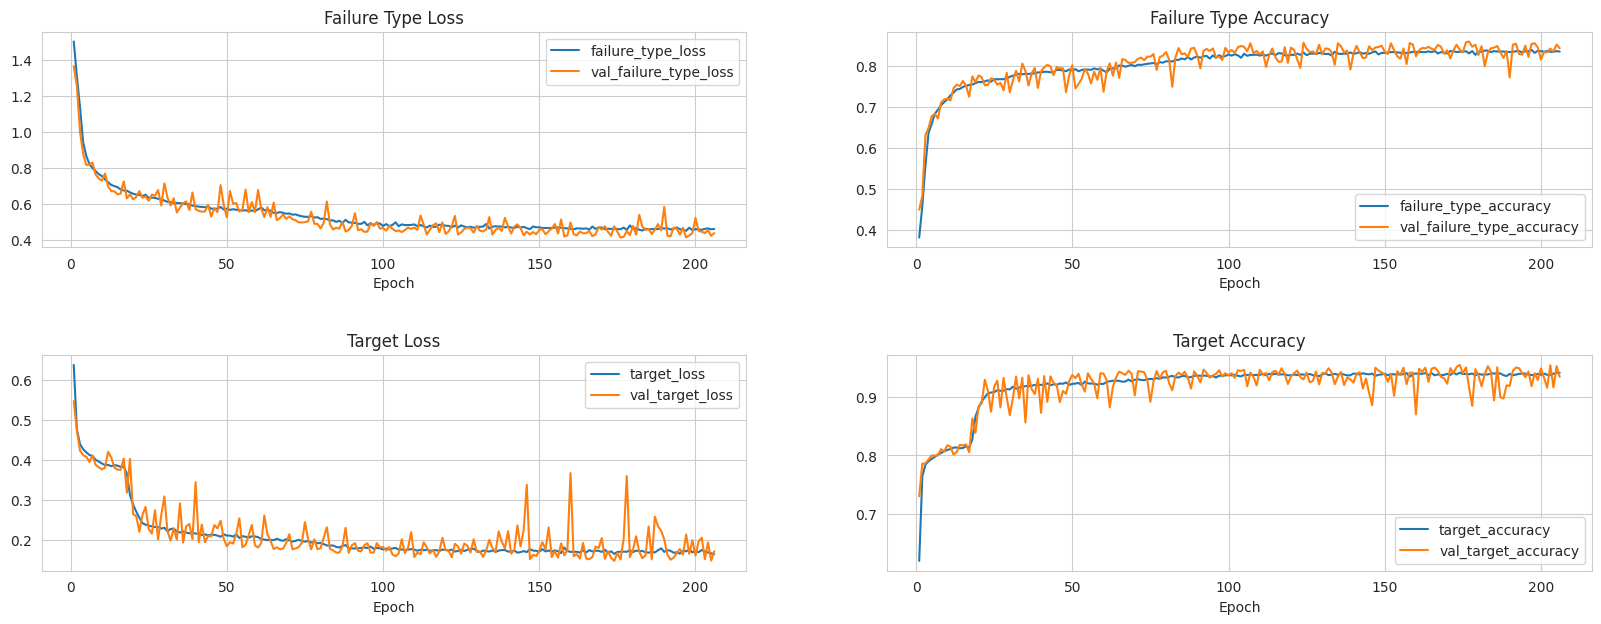

In [54]:
import matplotlib.pyplot as plt

epoch = len(history.history['failure_type_loss'])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
fig.subplots_adjust(hspace=0.5)

# Failure type loss
ax[0, 0].plot(range(1, epoch+1), history.history['failure_type_loss'], label='failure_type_loss')
ax[0, 0].plot(range(1, epoch+1), history.history['val_failure_type_loss'], label='val_failure_type_loss')
ax[0, 0].set_title('Failure Type Loss')
ax[0, 0].legend()
ax[0, 0].set_xlabel('Epoch')

# failure type accuracy
ax[0, 1].plot(range(1, epoch+1), history.history['failure_type_accuracy'], label='failure_type_accuracy')
ax[0, 1].plot(range(1, epoch+1), history.history['val_failure_type_accuracy'], label='val_failure_type_accuracy')
ax[0, 1].set_title('Failure Type Accuracy')
ax[0, 1].legend()
ax[0, 1].set_xlabel('Epoch')

# target loss
ax[1, 0].plot(range(1, epoch+1), history.history['target_loss'], label='target_loss')
ax[1, 0].plot(range(1, epoch+1), history.history['val_target_loss'], label='val_target_loss')
ax[1, 0].set_title('Target Loss')
ax[1, 0].legend()
ax[1, 0].set_xlabel('Epoch')

# Target accuracy
ax[1, 1].plot(range(1, epoch+1), history.history['target_accuracy'], label='target_accuracy')
ax[1, 1].plot(range(1, epoch+1), history.history['val_target_accuracy'], label='val_target_accuracy')
ax[1, 1].set_title('Target Accuracy')
ax[1, 1].legend()
ax[1, 1].set_xlabel('Epoch')

plt.show()


In [55]:
# Find the best epoch
best_epoch = history.epoch[np.argmin(history.history['val_loss'])]
print(f"Best epoch: {best_epoch}")

Best epoch: 175


In [56]:
from sklearn.metrics import classification_report

# Get the predictions for y1 and y2 for the training and test sets
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Get the predicted class for y1 and y2 for the training and test sets
y1_train_pred = train_predictions[0].argmax(axis=1)
y1_test_pred = test_predictions[0].argmax(axis=1)
y2_train_pred = (train_predictions[1] > 0.5).astype(int).flatten()
y2_test_pred = (test_predictions[1] > 0.5).astype(int).flatten()

# Print the classification report for y1 on the training set
print("Classification Report - Failure Type - Training Set:")
print(classification_report(y1_train, y1_train_pred, zero_division=1.0))
print('_'*50)

# Print the classification report for y1 on the test set
print("Classification Report - Failure Type - Test Set:")
print(classification_report(y1_test, y1_test_pred, zero_division=1.0))
print('_'*50)

# Print the classification report for y2 on the training set
print("Classification Report - Target - Training Set:")
print(classification_report(y2_train, y2_train_pred))
print('_'*50)

# Print the classification report for y2 on the test set
print("Classification Report - Target - Test Set:")
print(classification_report(y2_test, y2_test_pred))


928/928 [==============================] - 1s 1ms/step
Classification Report - Failure Type - Training Set:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      9503
           1       0.85      0.73      0.78     18557
           2       0.87      0.92      0.89      9827
           3       0.97      0.96      0.96      9883
           4       0.77      0.81      0.79     18479
           5       0.89      0.97      0.93      9425

    accuracy                           0.84     75674
   macro avg       0.85      0.86      0.85     75674
weighted avg       0.84      0.84      0.84     75674

__________________________________________________
Classification Report - Failure Type - Test Set:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3643
           1       0.85      0.72      0.78      7379
           2       0.87      0.92      0.89      3883
           3       0.97      0.9

This AI model aims to make predictions for two outputs: failure type and target. To do this, the data was first preprocessed and split into input features (x) and two target variables (y1 and y2) which were randomly separated into training, validation, and testing sets using the scikit-learn library's train_test_split function.

The model architecture comprises an input layer, two hidden layers, and two output layers. Each hidden layer has three fully connected (Dense) layers that use the rectified linear unit (ReLU) activation function. The output layer for the failure type prediction has six neurons representing each of the six possible failure types, with a softmax activation function. On the other hand, the output layer for the target prediction has only one neuron with a sigmoid activation function, which outputs a probability between 0 and 1.

To prevent overfitting, early stopping was implemented. The early stopping callback monitors the validation loss and stops training when it doesn't improve after 30 epochs.

The model was trained and tested on the prepared data, achieving an accuracy of 92% in both training and test sets. This suggests that the model learned the patterns in the data and can make accurate predictions on new data.

To train the model, the fit method was used, with the training data, target variables, number of epochs, batch size, validation data, and the early stopping callback as parameters.

To sum up, this AI model is capable of simultaneously predicting two outputs and was trained using TensorFlow with the Adam optimizer, categorical and binary cross-entropy loss functions, and early stopping to prevent overfitting.

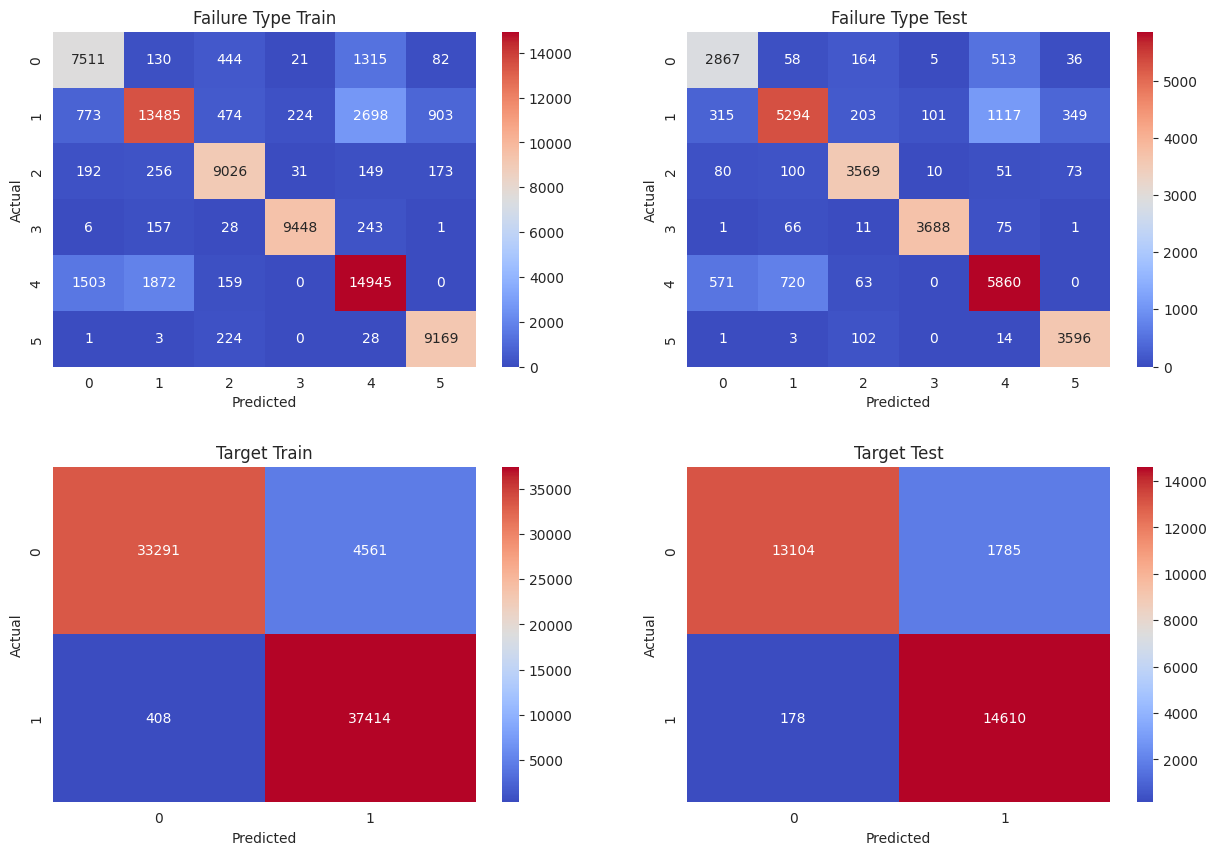

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create confusion matrices
cm_y1_train = confusion_matrix(y_true=y1_train, y_pred=y1_train_pred)
cm_y1_test = confusion_matrix(y_true=y1_test, y_pred=y1_test_pred)
cm_y2_train = confusion_matrix(y_true=y2_train, y_pred=y2_train_pred)
cm_y2_test = confusion_matrix(y_true=y2_test, y_pred=y2_test_pred)

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)

# plot y1_train confusion matrix
sns.heatmap(cm_y1_train, annot=True, cmap='coolwarm', ax=axs[0, 0], fmt='d')
axs[0, 0].set_title('Failure Type Train')
axs[0, 0].set_xlabel('Predicted')
axs[0, 0].set_ylabel('Actual')

# plot y1_test confusion matrix
sns.heatmap(cm_y1_test, annot=True, cmap='coolwarm', ax=axs[0, 1], fmt='d')
axs[0, 1].set_title('Failure Type Test')
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('Actual')

# plot y2_train confusion matrix
sns.heatmap(cm_y2_train, annot=True, cmap='coolwarm', ax=axs[1, 0], fmt='d')
axs[1, 0].set_title('Target Train')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Actual')

# plot y2_test confusion matrix
sns.heatmap(cm_y2_test, annot=True, cmap='coolwarm', ax=axs[1, 1], fmt='d')
axs[1, 1].set_title('Target Test')
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('Actual')

plt.show()


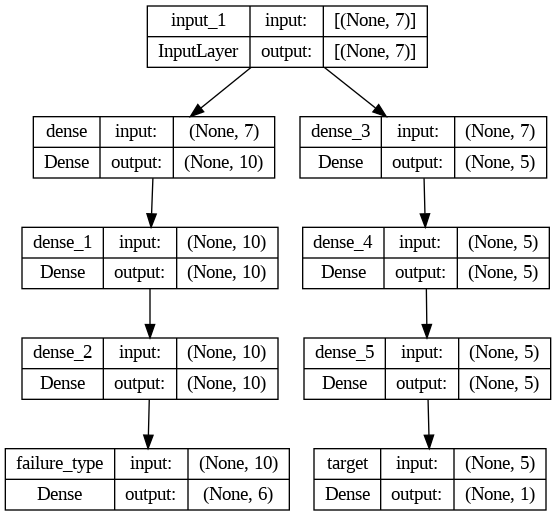

In [58]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras

keras.utils.plot_model(model, show_shapes=True)

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 10)           80          ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 5)            40          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           110         ['dense[0][0]']                  
                                                                                              